In [1]:
import pandas as pd
df = pd.read_csv('/home/hashim/Assignments/Sem6/DataMining/DM_Proj/data/COMED_hourly_preprocessed.csv')
df

,Datetime,COMED_MW_scaled,Season_encoded,Time_of_day_encoded,Holiday_encoded
0,2011-01-01 01:00:00,-0.557143,3,3,1
1,2011-01-01 02:00:00,-0.688278,3,3,1
2,2011-01-01 03:00:00,-0.784249,3,3,1
3,2011-01-01 04:00:00,-0.883150,3,3,1
4,2011-01-01 05:00:00,-0.900366,3,3,1
...,...,...,...,...,...
66492,2018-08-02 20:00:00,1.935897,2,1,1
66493,2018-08-02 21:00:00,1.625641,2,1,1
66494,2018-08-02 22:00:00,1.441026,2,3,1
66495,2018-08-02 23:00:00,1.207326,2,3,1


In [7]:
#df = df.set_index('Datetime')
#df
# We could have set the index as Datetime, however, we will not be using the index for any operations and ARIMA model requires the data to be in a specific format.

In [2]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['COMED_MW_scaled'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[1] > 0.05:
    print('Data is not stationary')
else:
    print('Data is stationary')

# No need to difference the data as it is already stationary

ADF Statistic: -14.831167
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Data is stationary


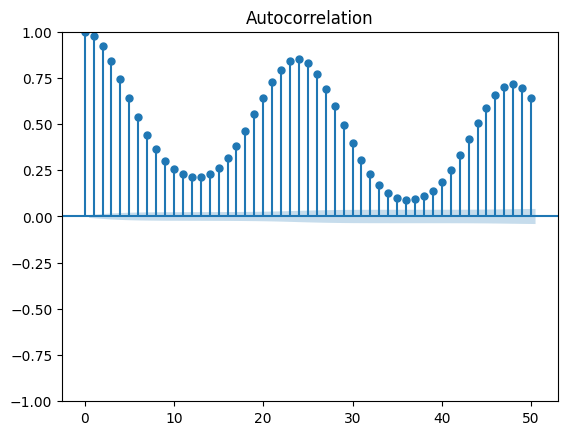

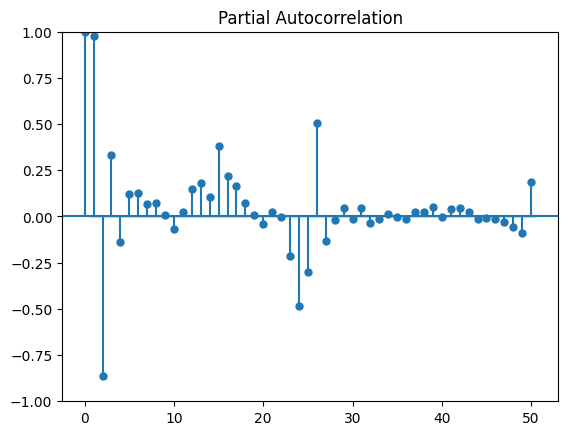

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plot_acf(df['COMED_MW_scaled'], lags=50)
plt.show()
plot_pacf(df['COMED_MW_scaled'], lags=50)
plt.show()

## So what is AutoCorrelation and Partial AutoCorrelation?
### AutoCorrelation:
is the correlation between the series and the same series lagged by x time units.
### Partial AutoCorrelation:
is the correlation between the series and the same series lagged by x time units but after eliminating the variations already explained by the intervening comparisons.

In [14]:
# use PCA to fit all 4 columns into 1 column
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
df['COMED_MW_scaled'] = pca.fit_transform(df[['COMED_MW_scaled','Season_encoded','Time_of_day_encoded']])
df
# Since the ARIMA model uses only 1 column, we will use PCA to fit 3 columns into 1 column.

,Datetime,COMED_MW_scaled,Season_encoded,Time_of_day_encoded,Holiday_encoded
0,2011-01-01 01:00:00,-0.907578,3,3,1
1,2011-01-01 02:00:00,-0.953618,3,3,1
2,2011-01-01 03:00:00,-0.987313,3,3,1
3,2011-01-01 04:00:00,-1.022037,3,3,1
4,2011-01-01 05:00:00,-1.028081,3,3,1
...,...,...,...,...,...
66492,2018-08-02 20:00:00,1.764267,2,1,1
66493,2018-08-02 21:00:00,1.655338,2,1,1
66494,2018-08-02 22:00:00,-0.787778,2,3,1
66495,2018-08-02 23:00:00,-0.869829,2,3,1


In [15]:
# Divide the DataFrame into training and testing data
train = df.iloc[:int(0.8 * len(df))]
test = df.iloc[int(0.8 * len(df)):]

In [16]:
from pmdarima import auto_arima
stepwise_fit=auto_arima(df["COMED_MW_scaled"], trace=True, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=155189.962, Time=16.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=155419.425, Time=3.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=155365.957, Time=1.94 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=155369.566, Time=2.85 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=155417.425, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=37.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=37.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=54.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=51.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=155219.987, Time=11.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=155091.750, Time=25.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=155249.792, Time=5.57 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=152712.492, Time=43.30 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=155240.964, Time=9.63 sec
 ARIMA(2,1,4)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                66497
Model:               SARIMAX(2, 1, 5)   Log Likelihood              -71517.282
Date:                Sun, 12 May 2024   AIC                         143052.564
Time:                        22:03:49   BIC                         143134.508
Sample:                             0   HQIC                        143077.896
                              - 66497                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0025      0.003      0.794      0.427      -0.004       0.009
ar.L1          1.0996      0.010    111.054      0.000       1.080       1.119
ar.L2         -0.6380      0.007    -86.904      0.000      -0.652      -0.624
ma.L1         -1.2229      0.013    -93.590      0.000      -1.249      -1.197
ma.L2          0.7746      0.014     56.584      0.000       0.748       0.801
ma.L3         -0.0096      0.024     -0.408      0.684      -0.056       0.037
ma.L4         -0.0115      0.028     -0.408      0.683      -0.067       0.044
ma.L5          0.2319      0.020     11.438      0.000       0.192       0.272
sigma2         0.5023      0.003    159.108      0.000       0.496       0.509
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):             17962.03
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.09
Prob(H) (two-sided):                  0.71   Kurtosis:                         5.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import itertools
import pandas as pd
from concurrent.futures import ProcessPoolExecutor, as_completed

def fit_arima_model(data_values, params):
    try:
        p, d, q = params['p'], params['d'], params['q']
        trend = params['trend']

        model = ARIMA(data_values, order=(p, d, q), trend=trend)
        fitted_model = model.fit()
        mse = mean_squared_error(data_values, fitted_model.fittedvalues)

        return params, mse
    except Exception as e:
        return params, float('inf')

def arima_grid_search(data_values, param_space):
    # Create all combinations of parameters
    keys, values = zip(*param_space.items())
    param_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]
    
    best_params = None
    best_mse = float('inf')
    
    # Using ProcessPoolExecutor to parallelize the fitting process
    with ProcessPoolExecutor() as executor:
        future_to_params = {executor.submit(fit_arima_model, data_values, params): params for params in param_combinations}
        
        for future in as_completed(future_to_params):
            params, mse = future.result()
            if mse < best_mse:
                best_mse = mse
                best_params = params
            # Optionally print parameters and MSE
            print(params, 'MSE:', mse)

    return best_params, best_mse

# Example usage:
# Define your parameter space
param_space = {
    'p': range(0, 6),
    'd': range(0, 6),
    'q': range(0, 6),
    'trend': ['n', 'c', 't', 'ct']
}

# Example data_values (scaled)
data_values = list(df['COMED_MW_scaled'])  # Make sure df['COMED_MW_scaled'] is defined and properly scaled

# Perform the grid search
best_params, best_mse = arima_grid_search(data_values, param_space)

print('Best Parameters:', best_params)
print('Best MSE:', best_mse)


{'p': 0, 'd': 0, 'q': 0, 'trend': 'n'} MSE: 2.719574531609435
{'p': 0, 'd': 0, 'q': 1, 'trend': 'n'} MSE: 1.2159649704553932
{'p': 0, 'd': 0, 'q': 0, 'trend': 't'} MSE: 2.719421597163649
{'p': 0, 'd': 0, 'q': 0, 'trend': 'ct'} MSE: 2.7189607979418904
{'p': 0, 'd': 0, 'q': 1, 'trend': 'c'} MSE: 1.215964969999815
{'p': 0, 'd': 0, 'q': 0, 'trend': 'c'} MSE: 2.719574531633633
{'p': 0, 'd': 0, 'q': 2, 'trend': 'n'} MSE: 0.8328800277860006


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 0, 'd': 0, 'q': 1, 'trend': 't'} MSE: 2.55870064373797


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 0, 'd': 0, 'q': 3, 'trend': 'n'} MSE: 0.6882202018177928
{'p': 0, 'd': 0, 'q': 2, 'trend': 'c'} MSE: 0.8328800274067931
{'p': 0, 'd': 0, 'q': 1, 'trend': 'ct'} MSE: 2.557658328267214


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 0, 'd': 0, 'q': 2, 'trend': 't'} MSE: 4.044631002564485
{'p': 0, 'd': 0, 'q': 3, 'trend': 'c'} MSE: 0.6882202012553116


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 0, 'd': 0, 'q': 2, 'trend': 'ct'} MSE: 4.042194021081524
{'p': 0, 'd': 0, 'q': 4, 'trend': 'n'} MSE: 0.5955605049161075


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 0, 'd': 0, 'q': 3, 'trend': 't'} MSE: 1.054190984286624
{'p': 0, 'd': 0, 'q': 3, 'trend': 'ct'} MSE: 1.0537768080994088
{'p': 0, 'd': 0, 'q': 5, 'trend': 'n'} MSE: 0.5917430936410741
{'p': 0, 'd': 0, 'q': 4, 'trend': 'c'} MSE: 0.5955605041401146
{'p': 0, 'd': 1, 'q': 0, 'trend': 'n'} MSE: 0.6061322895832235
{'p': 0, 'd': 1, 'q': 0, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 0, 'd': 0, 'q': 4, 'trend': 't'} MSE: 0.6675551251980512
{'p': 0, 'd': 1, 'q': 0, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 1, 'q': 1, 'trend': 'n'} MSE: 0.6056597622658552
{'p': 0, 'd': 1, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 1, 'q': 0, 'trend': 't'} MSE: 0.6061322894237343
{'p': 0, 'd': 1, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 0, 'd': 1, 'q': 2, 'trend': 'n'} MSE: 0.6049675045044436
{'p': 0, 'd': 1, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 1, 'q': 1, 'trend': 't'} MSE: 0.6056597621031928
{'p': 0, 'd': 1, 'q': 2, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 0, 'q': 4, 'trend': 'ct'} MSE: 0.6675088215672091
{'p': 0, 'd': 1, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 1, 'q': 3, 'trend': 'n'} MSE: 0.6045334418469884
{'p': 0, 'd': 1, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 1, 'q': 2, 'trend': 't'} MSE: 0.6049675043398997
{'p': 0, 'd': 1, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 1, 'q': 4, 'trend': 'n'} MSE: 0.6044350056200287
{'p': 0, 'd': 1, 'q': 4, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 1, 'q': 3, 'trend': 't'} MSE: 0.6045334416545293
{'p': 0, 'd': 1, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 0, 'q': 5, 'trend': 'c'} MSE: 0.591743092605416
{'p': 0, 'd': 1, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 0, 'q': 5, 'trend': 't'} MSE: 1.1138948642966797
{'p': 0, 'd': 2, 'q': 0, 'trend': 'c'} MSE: i

/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 0, 'd': 1, 'q': 4, 'trend': 't'} MSE: 0.6044350054023809
{'p': 0, 'd': 2, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 2, 'q': 2, 'trend': 't'} MSE: inf
{'p': 0, 'd': 2, 'q': 2, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 0, 'q': 5, 'trend': 'ct'} MSE: 1.1130132256309058
{'p': 0, 'd': 2, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 2, 'q': 3, 'trend': 't'} MSE: inf
{'p': 0, 'd': 2, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 2, 'q': 1, 'trend': 'n'} MSE: 0.6062266487177156
{'p': 0, 'd': 2, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 2, 'q': 4, 'trend': 't'} MSE: inf
{'p': 0, 'd': 2, 'q': 4, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 2, 'q': 2, 'trend': 'n'} MSE: 0.6057560130138098
{'p': 0, 'd': 2, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 2, 'q': 5, 'trend': 't'} MSE: inf
{'p': 0, 'd': 2, 'q': 5, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 3, 'q': 0, 'trend': 'n'} MSE: 3.540416697348272
{'p': 0, 'd': 3, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 3, 'q': 0, 'trend': 't'} MSE: inf
{'p': 0, 'd': 3, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 1, 'q': 5, 'trend': 'n'} MSE: 0.5690274699210043
{'p': 0, 'd': 3, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 3, 'q': 1, 'trend': 't'} MSE: inf
{'p': 0, 'd': 3, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 2, 'q': 4, 'trend': 'n'} MSE: 0.657021180682495
{'p': 0, 'd': 3, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 3, 'q': 2, 'trend': 't'} MSE: inf
{'p': 0, 'd': 3, 'q': 2, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 3, 'q': 1, 'trend': 'n'} MSE: 1.177454854748573
{'p': 0, 'd': 3, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 3, 'q': 3, 'trend': 't'} MSE: inf
{'p': 0, 'd': 3, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 2, 'q': 5, 'trend': 'n'} MSE: 0.6133406714084775
{'p': 0, 'd': 3, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 3, 'q': 4, 'trend': 't'} MSE: inf
{'p': 0, 'd': 3, 'q': 4, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 3, 'q': 2, 'trend': 'n'} MSE: 0.6080251502599852
{'p': 0, 'd': 3, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 3, 'q': 5, 'trend': 't'} MSE: inf
{'p': 0, 'd': 3, 'q': 5, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 3, 'q': 3, 'trend': 'n'} MSE: 0.7141703144648845
{'p': 0, 'd': 4, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 4, 'q': 0, 'trend': 't'} MSE: inf
{'p': 0, 'd': 4, 'q': 0, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 4, 'q': 0, 'trend': 'n'} MSE: 11.819533202167577
{'p': 0, 'd': 4, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 4, 'q': 1, 'trend': 't'} MSE: inf
{'p': 0, 'd': 4, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 4, 'q': 2, 'trend': 'n'} MSE: 1.3198188563335387
{'p': 0, 'd': 4, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 4, 'q': 2, 'trend': 't'} MSE: inf
{'p': 0, 'd': 4, 'q': 2, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 2, 'q': 3, 'trend': 'n'} MSE: 0.6050608790160605
{'p': 0, 'd': 4, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 4, 'q': 3, 'trend': 't'} MSE: inf
{'p': 0, 'd': 4, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 4, 'q': 1, 'trend': 'n'} MSE: 3.541002006913736
{'p': 0, 'd': 4, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 4, 'q': 4, 'trend': 't'} MSE: inf
{'p': 0, 'd': 4, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 3, 'q': 4, 'trend': 'n'} MSE: 0.6061456455327927
{'p': 0, 'd': 4, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 4, 'q': 5, 'trend': 't'} MSE: inf
{'p': 0, 'd': 4, 'q': 5, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 5, 'q': 0, 'trend': 'n'} MSE: 41.400641202561616
{'p': 0, 'd': 5, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 5, 'q': 0, 'trend': 't'} MSE: inf
{'p': 0, 'd': 5, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 1, 'q': 5, 'trend': 't'} MSE: 0.5690274503428332
{'p': 0, 'd': 5, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 5, 'q': 1, 'trend': 't'} MSE: inf
{'p': 0, 'd': 5, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 4, 'q': 3, 'trend': 'n'} MSE: 0.7156645357314113
{'p': 0, 'd': 5, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 5, 'q': 2, 'trend': 't'} MSE: inf
{'p': 0, 'd': 5, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 3, 'q': 5, 'trend': 'n'} MSE: 0.6563321801016024
{'p': 0, 'd': 5, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 5, 'q': 3, 'trend': 't'} MSE: inf
{'p': 0, 'd': 5, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 0, 'd': 5, 'q': 1, 'trend': 'n'} MSE: 11.822133589487235
{'p': 0, 'd': 5, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 5, 'q': 4, 'trend': 't'} MSE: inf
{'p': 0, 'd': 5, 'q': 4, 'trend': 'ct'} MSE: inf
{'p': 0, 'd': 5, 'q': 2, 'trend': 'n'} MSE: 3.54517900985319
{'p': 0, 'd': 5, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 0, 'd': 5, 'q': 5, 'trend': 't'} MSE: inf
{'p': 0, 'd': 5, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 1, 'd': 0, 'q': 0, 'trend': 'n'} MSE: 0.5723604875302764
{'p': 1, 'd': 0, 'q': 0, 'trend': 'c'} MSE: 0.5723604875168598
{'p': 0, 'd': 4, 'q': 4, 'trend': 'n'} MSE: 0.7145412928844317


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 0, 'd': 4, 'q': 5, 'trend': 'n'} MSE: 0.7129223015797959
{'p': 1, 'd': 0, 'q': 0, 'trend': 'ct'} MSE: 0.5723537952069611
{'p': 1, 'd': 0, 'q': 0, 'trend': 't'} MSE: 0.572358515854966
{'p': 1, 'd': 0, 'q': 1, 'trend': 'n'} MSE: 0.5686029548004741


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 1, 'd': 0, 'q': 1, 'trend': 't'} MSE: 0.5686187559919528
{'p': 1, 'd': 0, 'q': 1, 'trend': 'c'} MSE: 0.5686029512342936
{'p': 1, 'd': 0, 'q': 2, 'trend': 'n'} MSE: 0.5644942271970504
{'p': 1, 'd': 0, 'q': 1, 'trend': 'ct'} MSE: 0.568613259213525


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 0, 'd': 5, 'q': 3, 'trend': 'n'} MSE: 1.320854528390865
{'p': 1, 'd': 0, 'q': 2, 'trend': 'c'} MSE: 0.564494224218252
{'p': 1, 'd': 0, 'q': 3, 'trend': 'n'} MSE: 0.5609763269809545


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 1, 'd': 0, 'q': 2, 'trend': 't'} MSE: 0.5647527517946046


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 0, 'd': 5, 'q': 4, 'trend': 'n'} MSE: 0.7487940823321508


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 1, 'd': 0, 'q': 2, 'trend': 'ct'} MSE: 0.5647468526620556
{'p': 1, 'd': 0, 'q': 3, 'trend': 'c'} MSE: 0.5609763229372949
{'p': 1, 'd': 0, 'q': 3, 'trend': 't'} MSE: 0.5774639791280131
{'p': 1, 'd': 0, 'q': 4, 'trend': 'n'} MSE: 0.5603469519380561


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 0, 'd': 5, 'q': 5, 'trend': 'n'} MSE: 0.7553855451311002
{'p': 1, 'd': 0, 'q': 3, 'trend': 'ct'} MSE: 0.5774789634405789
{'p': 1, 'd': 0, 'q': 4, 'trend': 'c'} MSE: 0.5603469478368804
{'p': 1, 'd': 0, 'q': 4, 'trend': 't'} MSE: 0.578967970954067
{'p': 1, 'd': 1, 'q': 0, 'trend': 'n'} MSE: 0.6056268906685134
{'p': 1, 'd': 1, 'q': 0, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 0, 'q': 5, 'trend': 'n'} MSE: 0.5578839744261793
{'p': 1, 'd': 1, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'p': 1, 'd': 1, 'q': 0, 'trend': 't'} MSE: 0.6056268905602636
{'p': 1, 'd': 1, 'q': 1, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 0, 'q': 4, 'trend': 'ct'} MSE: 0.5790011044110726
{'p': 1, 'd': 1, 'q': 1, 'trend': 'ct'} MSE: inf
{'p': 1, 'd': 1, 'q': 1, 'trend': 'n'} MSE: 0.6042807091032514
{'p': 1, 'd': 1, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 0, 'q': 5, 'trend': 't'} MSE: 0.5664526270691757
{'p': 1, 'd': 1, 'q': 2, 'trend': 'ct'} MSE: inf
{'p': 1, 'd': 1, 'q': 2, 'trend': 'n'} MSE: 0.5634331097472395
{'p': 1, 'd': 1, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 1, 'q': 1, 'trend': 't'} MSE: 0.6042807088784846
{'p': 1, 'd': 1, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 1, 'd': 0, 'q': 5, 'trend': 'ct'} MSE: 0.5664554043645315
{'p': 1, 'd': 1, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 0, 'q': 5, 'trend': 'c'} MSE: 0.5578839690406535
{'p': 1, 'd': 1, 'q': 4, 'trend': 'ct'} MSE: inf
{'p': 1, 'd': 1, 'q': 3, 'trend': 'n'} MSE: 0.6030801114252342
{'p': 1, 'd': 1, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 1, 'q': 4, 'trend': 'n'} MSE: 0.5818615264625836
{'p': 1, 'd': 1, 'q': 5, 'trend': 'ct'} MSE

/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 1, 'q': 4, 'trend': 't'} MSE: 0.5818615253395283
{'p': 1, 'd': 3, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 3, 'q': 1, 'trend': 't'} MSE: inf
{'p': 1, 'd': 3, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 3, 'q': 1, 'trend': 'n'} MSE: 0.8787305356911979
{'p': 1, 'd': 3, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 3, 'q': 2, 'trend': 't'} MSE: inf
{'p': 1, 'd': 3, 'q': 2, 'trend': 'ct'} MSE: inf
{'p': 1, 'd': 2, 'q': 5, 'trend': 'n'} MSE: 0.653301146274364
{'p': 1, 'd': 3, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 3, 'q': 3, 'trend': 't'} MSE: inf
{'p': 1, 'd': 3, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 1, 'd': 2, 'q': 3, 'trend': 'n'} MSE: 0.5984977764301821
{'p': 1, 'd': 3, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 3, 'q': 4, 'trend': 't'} MSE: inf
{'p': 1, 'd': 3, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 1, 'd': 2, 'q': 4, 'trend': 'n'} MSE: 0.6024505240733479
{'p': 1, 'd': 3, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 3, 'q': 5, 'trend': 't'} MSE: inf
{'p': 1, 'd': 3, 'q': 5, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 4, 'q': 0, 'trend': 'n'} MSE: 5.145783255984257
{'p': 1, 'd': 4, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 4, 'q': 0, 'trend': 't'} MSE: inf
{'p': 1, 'd': 4, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 3, 'q': 4, 'trend': 'n'} MSE: 0.6000357960644561
{'p': 1, 'd': 4, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 4, 'q': 1, 'trend': 't'} MSE: inf
{'p': 1, 'd': 4, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 3, 'q': 2, 'trend': 'n'} MSE: 0.6062859259947259
{'p': 1, 'd': 4, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 4, 'q': 2, 'trend': 't'} MSE: inf
{'p': 1, 'd': 4, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 4, 'q': 1, 'trend': 'n'} MSE: 1.9550094236072622
{'p': 1, 'd': 4, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 4, 'q': 3, 'trend': 't'} MSE: inf
{'p': 1, 'd': 4, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 1, 'd': 1, 'q': 5, 'trend': 't'} MSE: 0.5560866377288821
{'p': 1, 'd': 4, 'q': 4, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 4, 'q': 4, 'trend': 't'} MSE: inf
{'p': 1, 'd': 4, 'q': 4, 'trend': 'ct'} MSE: inf
{'p': 1, 'd': 3, 'q': 5, 'trend': 'n'} MSE: 0.6116614160612972
{'p': 1, 'd': 4, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 4, 'q': 5, 'trend': 't'} MSE: inf
{'p': 1, 'd': 4, 'q': 5, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 4, 'q': 2, 'trend': 'n'} MSE: 0.8804561723989571
{'p': 1, 'd': 5, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 5, 'q': 0, 'trend': 't'} MSE: inf
{'p': 1, 'd': 5, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 5, 'q': 0, 'trend': 'n'} MSE: 14.84424035386238
{'p': 1, 'd': 5, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 5, 'q': 1, 'trend': 't'} MSE: inf
{'p': 1, 'd': 5, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 3, 'q': 3, 'trend': 'n'} MSE: 0.6008257041051062
{'p': 1, 'd': 5, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 5, 'q': 2, 'trend': 't'} MSE: inf
{'p': 1, 'd': 5, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 5, 'q': 1, 'trend': 'n'} MSE: 5.146827271787393
{'p': 1, 'd': 5, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 5, 'q': 3, 'trend': 't'} MSE: inf
{'p': 1, 'd': 5, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 4, 'q': 3, 'trend': 'n'} MSE: 1.2900242305298373
{'p': 1, 'd': 5, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 5, 'q': 4, 'trend': 't'} MSE: inf
{'p': 1, 'd': 5, 'q': 4, 'trend': 'ct'} MSE: inf
{'p': 1, 'd': 5, 'q': 2, 'trend': 'n'} MSE: 1.9575855164251634
{'p': 1, 'd': 5, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 1, 'd': 5, 'q': 5, 'trend': 't'} MSE: inf
{'p': 1, 'd': 5, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 0, 'q': 0, 'trend': 'n'} MSE: 0.5677669992539172
{'p': 2, 'd': 0, 'q': 0, 'trend': 'c'} MSE: 0.5677669992140686


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 1, 'd': 4, 'q': 5, 'trend': 'n'} MSE: 0.7063913690442982


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 4, 'q': 4, 'trend': 'n'} MSE: 0.7083668896267346


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 0, 'q': 0, 'trend': 't'} MSE: 0.5677646716892328


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 0, 'q': 1, 'trend': 'n'} MSE: 0.536218952494941


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 0, 'q': 0, 'trend': 'ct'} MSE: 0.5677588780988105


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 0, 'q': 1, 'trend': 't'} MSE: 2.7194209364894957


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 0, 'q': 1, 'trend': 'c'} MSE: 0.5362189539782942


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 0, 'q': 1, 'trend': 'ct'} MSE: 2.718960137270638


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 5, 'q': 3, 'trend': 'n'} MSE: 0.8991918374326692


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 5, 'q': 4, 'trend': 'n'} MSE: 1.2042611109999954


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 0, 'q': 2, 'trend': 'n'} MSE: 0.5274229711422576


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 0, 'q': 2, 'trend': 't'} MSE: 2.7194209364894957


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 0, 'q': 2, 'trend': 'ct'} MSE: 2.718960137270638


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 1, 'd': 5, 'q': 5, 'trend': 'n'} MSE: 0.713170664709466


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 0, 'q': 3, 'trend': 'n'} MSE: 0.411484645855694


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 0, 'q': 2, 'trend': 'c'} MSE: 0.5274229673141438
{'p': 2, 'd': 0, 'q': 3, 'trend': 't'} MSE: 2.7194209364894957


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 0, 'q': 3, 'trend': 'ct'} MSE: 2.718960137270638
{'p': 2, 'd': 0, 'q': 4, 'trend': 'n'} MSE: 0.39523381931042967


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 0, 'q': 4, 'trend': 't'} MSE: 0.5186829839269702
{'p': 2, 'd': 0, 'q': 5, 'trend': 'n'} MSE: 0.45927077053584475


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 0, 'q': 4, 'trend': 'ct'} MSE: 0.5186648137377331
{'p': 2, 'd': 1, 'q': 0, 'trend': 'n'} MSE: 0.6048748441942775
{'p': 2, 'd': 1, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 1, 'q': 0, 'trend': 't'} MSE: 0.6048748440877568
{'p': 2, 'd': 1, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 0, 'q': 3, 'trend': 'c'} MSE: 0.4114846441822627
{'p': 2, 'd': 1, 'q': 1, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'p': 2, 'd': 1, 'q': 1, 'trend': 'n'} MSE: 0.5622108779671302
{'p': 2, 'd': 1, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 1, 'q': 2, 'trend': 'n'} MSE: 0.6039715792696014
{'p': 2, 'd': 1, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 0, 'q': 4, 'trend': 'c'} MSE: 0.39523381830392146
{'p': 2, 'd': 1, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 0, 'q': 5, 'trend': 'c'} MSE: 0.45927076635623204
{'p': 2, 'd': 1, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 0, 'q': 5, 'trend': 't'} MSE: 0.5202379560029403
{'p': 2, 'd': 1, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 0, 'q': 5, 'trend': 'ct'} MSE: 0.5201843359807611
{'p': 2, 'd': 1, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 1, 'q': 1, 'trend': 't'} MSE: 0.5622109093370147
{'p': 2, 'd': 1, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 1, 'q': 2, 'trend': 't'} MSE: 0.603971579083751
{'p': 2, 'd': 1, 'q': 5, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 1, 'q': 4, 'trend': 'n'} MSE: 0.5544123577721416
{'p': 2, 'd': 1, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 2, 'q': 0, 'trend': 'n'} MSE: 0.7812386413706465
{'p': 2, 'd': 2, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 2, 'q': 0, 'trend': 't'} MSE: inf
{'p': 2, 'd': 2, 'q': 0, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 1, 'q': 3, 'trend': 'n'} MSE: 0.5498466807378989
{'p': 2, 'd': 2, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 2, 'q': 1, 'trend': 't'} MSE: inf
{'p': 2, 'd': 2, 'q': 1, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 2, 'q': 1, 'trend': 'n'} MSE: 0.6049708961198202
{'p': 2, 'd': 2, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 2, 'q': 2, 'trend': 't'} MSE: inf
{'p': 2, 'd': 2, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 2, 'q': 2, 'trend': 'n'} MSE: 0.6045552014609757
{'p': 2, 'd': 2, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 2, 'q': 3, 'trend': 't'} MSE: inf
{'p': 2, 'd': 2, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 1, 'q': 5, 'trend': 'n'} MSE: 0.5034701143894441
{'p': 2, 'd': 2, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 2, 'q': 4, 'trend': 't'} MSE: inf
{'p': 2, 'd': 2, 'q': 4, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 1, 'q': 3, 'trend': 't'} MSE: 0.5498466843662925
{'p': 2, 'd': 2, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 2, 'q': 5, 'trend': 't'} MSE: inf
{'p': 2, 'd': 2, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 3, 'q': 0, 'trend': 'n'} MSE: 1.459866669445066
{'p': 2, 'd': 3, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 3, 'q': 0, 'trend': 't'} MSE: inf
{'p': 2, 'd': 3, 'q': 0, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 3, 'q': 1, 'trend': 'n'} MSE: 0.7813782712177062
{'p': 2, 'd': 3, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 3, 'q': 1, 'trend': 't'} MSE: inf
{'p': 2, '

/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 1, 'q': 4, 'trend': 't'} MSE: 0.5550630301268578
{'p': 2, 'd': 3, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 3, 'q': 2, 'trend': 't'} MSE: inf
{'p': 2, 'd': 3, 'q': 2, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 2, 'q': 5, 'trend': 'n'} MSE: 0.52861475500778
{'p': 2, 'd': 3, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 3, 'q': 3, 'trend': 't'} MSE: inf
{'p': 2, 'd': 3, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 2, 'q': 3, 'trend': 'n'} MSE: 0.5144079830992878
{'p': 2, 'd': 3, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 3, 'q': 4, 'trend': 't'} MSE: inf
{'p': 2, 'd': 3, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 2, 'q': 4, 'trend': 'n'} MSE: 0.5360683943884905
{'p': 2, 'd': 3, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 3, 'q': 5, 'trend': 't'} MSE: inf
{'p': 2, 'd': 3, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 4, 'q': 0, 'trend': 'n'} MSE: 3.281986357526795
{'p': 2, 'd': 4, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 4, 'q': 0, 'trend': 't'} MSE: inf
{'p': 2, 'd': 4, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 3, 'q': 3, 'trend': 'n'} MSE: 0.5997828685763266
{'p': 2, 'd': 4, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 4, 'q': 1, 'trend': 't'} MSE: inf
{'p': 2, 'd': 4, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 3, 'q': 2, 'trend': 'n'} MSE: 0.6072989244249113
{'p': 2, 'd': 4, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 4, 'q': 2, 'trend': 't'} MSE: inf
{'p': 2, 'd': 4, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 1, 'q': 5, 'trend': 't'} MSE: 0.5033037679590601
{'p': 2, 'd': 4, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 4, 'q': 3, 'trend': 't'} MSE: inf
{'p': 2, 'd': 4, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 4, 'q': 2, 'trend': 'n'} MSE: 0.7832356724175574
{'p': 2, 'd': 4, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 4, 'q': 4, 'trend': 't'} MSE: inf
{'p': 2, 'd': 4, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 4, 'q': 3, 'trend': 'n'} MSE: 1.0245720154370301
{'p': 2, 'd': 4, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 4, 'q': 5, 'trend': 't'} MSE: inf
{'p': 2, 'd': 4, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 4, 'q': 1, 'trend': 'n'} MSE: 1.4601496784972001
{'p': 2, 'd': 5, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 5, 'q': 0, 'trend': 't'} MSE: inf
{'p': 2, 'd': 5, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 5, 'q': 0, 'trend': 'n'} MSE: 8.387994967937653
{'p': 2, 'd': 5, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 5, 'q': 1, 'trend': 't'} MSE: inf
{'p': 2, 'd': 5, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 3, 'q': 4, 'trend': 'n'} MSE: 0.5517417079888876
{'p': 2, 'd': 5, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 5, 'q': 2, 'trend': 't'} MSE: inf
{'p': 2, 'd': 5, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 3, 'q': 5, 'trend': 'n'} MSE: 0.5648668398709211
{'p': 2, 'd': 5, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 5, 'q': 3, 'trend': 't'} MSE: inf
{'p': 2, 'd': 5, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 2, 'd': 5, 'q': 1, 'trend': 'n'} MSE: 3.2829314628096675
{'p': 2, 'd': 5, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 5, 'q': 4, 'trend': 't'} MSE: inf
{'p': 2, 'd': 5, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 5, 'q': 2, 'trend': 'n'} MSE: 1.462534571772421
{'p': 2, 'd': 5, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 2, 'd': 5, 'q': 5, 'trend': 't'} MSE: inf
{'p': 2, 'd': 5, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 3, 'd': 0, 'q': 0, 'trend': 'n'} MSE: 0.561593850865967
{'p': 3, 'd': 0, 'q': 0, 'trend': 'c'} MSE: 0.5615938508283558


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 4, 'q': 4, 'trend': 'n'} MSE: 0.7071445429997644
{'p': 3, 'd': 0, 'q': 0, 'trend': 't'} MSE: 0.5615910281804383
{'p': 3, 'd': 0, 'q': 0, 'trend': 'ct'} MSE: 0.5615837393486695
{'p': 3, 'd': 0, 'q': 1, 'trend': 'n'} MSE: 0.5303131812940793


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 2, 'd': 4, 'q': 5, 'trend': 'n'} MSE: 0.6665548157852129


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 5, 'q': 3, 'trend': 'n'} MSE: 0.989455388220725


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 0, 'q': 1, 'trend': 't'} MSE: 0.5652223655052525


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 0, 'q': 1, 'trend': 'c'} MSE: 0.5303131751260217


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 5, 'q': 5, 'trend': 'n'} MSE: 1.1708615647025145


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 0, 'q': 1, 'trend': 'ct'} MSE: 0.565216000520375


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 2, 'd': 5, 'q': 4, 'trend': 'n'} MSE: 1.038808183445352


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 2, 'trend': 't'} MSE: 2.7194209364894957


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 2, 'trend': 'n'} MSE: 0.5293000864136068


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 2, 'trend': 'ct'} MSE: 2.718960137270638


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 3, 'trend': 't'} MSE: 2.7194209364894957


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 3, 'trend': 'ct'} MSE: 2.718960137270638


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 3, 'trend': 'n'} MSE: 0.47555042647163637


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 4, 'trend': 'n'} MSE: 0.39651495379748886
{'p': 3, 'd': 0, 'q': 2, 'trend': 'c'} MSE: 0.5293062930595284


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 4, 'trend': 't'} MSE: 0.5070357393773827


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 4, 'trend': 'ct'} MSE: 0.5070001899322447


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 3, 'trend': 'c'} MSE: 0.47733776484947726
{'p': 3, 'd': 1, 'q': 0, 'trend': 'n'} MSE: 0.604295426774521
{'p': 3, 'd': 1, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 1, 'q': 0, 'trend': 't'} MSE: 0.6042954266471573
{'p': 3, 'd': 1, 'q': 0, 'trend': 'ct'} MSE: inf
{'p': 3, 'd': 0, 'q': 4, 'trend': 'c'} MSE: 0.3965149546775777
{'p': 3, 'd': 1, 'q': 1, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 1, 'q': 1, 'trend': 'n'} MSE: 0.6034533889507532
{'p': 3, 'd': 1, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 0, 'q': 5, 'trend': 'n'} MSE: 0.39477489330956694
{'p': 3, 'd': 1, 'q': 2, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 5, 'trend': 't'} MSE: 0.49588768347818935
{'p': 3, 'd': 1, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 1, 'q': 1, 'trend': 't'} MSE: 0.6034533884416836
{'p': 3, 'd': 1, 'q': 3, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'p': 3, 'd': 0, 'q': 5, 'trend': 'ct'} MSE: 0.49586023592601003
{'p': 3, 'd': 1, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 1, 'q': 2, 'trend': 'n'} MSE: 0.4623795603963692
{'p': 3, 'd': 1, 'q': 4, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 1, 'q': 3, 'trend': 'n'} MSE: 0.5500652378299519
{'p': 3, 'd': 1, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 0, 'q': 5, 'trend': 'c'} MSE: 0.39500357446067735
{'p': 3, 'd': 1, 'q': 5, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 1, 'q': 4, 'trend': 'n'} MSE: 0.5155818809731997
{'p': 3, 'd': 1, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 3, 'd': 2, 'q': 0, 'trend': 'n'} MSE: 0.7350381948643165
{'p': 3, 'd': 2, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 2, 'q': 0, 'trend': 't'} MSE: inf
{'p': 3, 'd': 2, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 1, 'q': 2, 'trend': 't'} MSE: 0.4619937469492727
{'p': 3, 'd': 2, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 2, 'q': 1, 'trend': 't'} MSE: inf
{'p': 3, 'd': 2, 'q': 1, 'trend': 'ct'} MSE: inf
{'p': 3, 'd': 1, 'q': 5, 'trend': 'n'} MSE: 0.48822862336183376
{'p': 3, 'd': 2, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 2, 'q': 2, 'trend': 't'} MSE: inf
{'p': 3, 'd': 2, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 1, 'q': 3, 'trend': 't'} MSE: 0.5500606088592742
{'p': 3, 'd': 2, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 2, 'q': 3, 'trend': 't'} MSE: inf
{'p': 3, 'd': 2, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 3, 'd': 2, 'q': 1, 'trend': 'n'} MSE: 0.6043883861930254
{'p': 3, 'd': 2, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 2, 'q': 4, 'trend': 't'} MSE: inf
{'p': 3, 'd': 2, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 2, 'q': 2, 'trend': 'n'} MSE: 0.6022603523891056
{'p': 3, 'd': 2, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 2, 'q': 5, 'trend': 't'} MSE: inf
{'p': 3, 'd': 2, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 3, 'd': 3, 'q': 0, 'trend': 'n'} MSE: 1.2221681141345238
{'p': 3, 'd': 3, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 3, 'q': 0, 'trend': 't'} MSE: inf
{'p': 3, 'd': 3, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'p': 3, 'd': 1, 'q': 4, 'trend': 't'} MSE: 0.522428878198856
{'p': 3, 'd': 3, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 3, 'q': 1, 'trend': 't'} MSE: inf
{'p': 3, 'd': 3, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 3, 'q': 1, 'trend': 'n'} MSE: 0.7351765644718554
{'p': 3, 'd': 3, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 3, 'q': 2, 'trend': 't'} MSE: inf
{'p': 3, 'd': 3, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 2, 'q': 3, 'trend': 'n'} MSE: 0.5046677242797546
{'p': 3, 'd': 3, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 3, 'q': 3, 'trend': 't'} MSE: inf
{'p': 3, 'd': 3, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 3, 'd': 2, 'q': 4, 'trend': 'n'} MSE: 0.549424192046727
{'p': 3, 'd': 3, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 3, 'q': 4, 'trend': 't'} MSE: inf
{'p': 3, 'd': 3, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 3, 'q': 2, 'trend': 'n'} MSE: 0.6068177692556136
{'p': 3, 'd': 3, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 3, 'q': 5, 'trend': 't'} MSE: inf
{'p': 3, 'd': 3, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 3, 'd': 2, 'q': 5, 'trend': 'n'} MSE: 0.5508295413508096
{'p': 3, 'd': 4, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 4, 'q': 0, 'trend': 't'} MSE: inf
{'p': 3, 'd': 4, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 4, 'q': 0, 'trend': 'n'} MSE: 2.324683674647312
{'p': 3, 'd': 4, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 4, 'q': 1, 'trend': 't'} MSE: inf
{'p': 3, 'd': 4, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 1, 'q': 5, 'trend': 't'} MSE: 0.49631437209361445
{'p': 3, 'd': 4, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 4, 'q': 2, 'trend': 't'} MSE: inf
{'p': 3, 'd': 4, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 4, 'q': 1, 'trend': 'n'} MSE: 1.2226996132880912
{'p': 3, 'd': 4, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 4, 'q': 3, 'trend': 't'} MSE: inf
{'p': 3, 'd': 4, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 3, 'd': 4, 'q': 2, 'trend': 'n'} MSE: 0.7370050664894268
{'p': 3, 'd': 4, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 4, 'q': 4, 'trend': 't'} MSE: inf
{'p': 3, 'd': 4, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 3, 'q': 4, 'trend': 'n'} MSE: 0.529004997143725
{'p': 3, 'd': 4, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 4, 'q': 5, 'trend': 't'} MSE: inf
{'p': 3, 'd': 4, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 3, 'd': 5, 'q': 0, 'trend': 'n'} MSE: 4.964015085086558
{'p': 3, 'd': 5, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 5, 'q': 0, 'trend': 't'} MSE: inf
{'p': 3, 'd': 5, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 3, 'q': 3, 'trend': 'n'} MSE: 0.6587172354193117
{'p': 3, 'd': 5, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 5, 'q': 1, 'trend': 't'} MSE: inf
{'p': 3, 'd': 5, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 3, 'q': 5, 'trend': 'n'} MSE: 0.5309855813559111
{'p': 3, 'd': 5, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 5, 'q': 2, 'trend': 't'} MSE: inf
{'p': 3, 'd': 5, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 4, 'q': 4, 'trend': 'n'} MSE: 0.7501415668541915
{'p': 3, 'd': 5, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 5, 'q': 3, 'trend': 't'} MSE: inf
{'p': 3, 'd': 5, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 3, 'd': 5, 'q': 3, 'trend': 'n'} MSE: 1.4323088059253894
{'p': 3, 'd': 5, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 5, 'q': 4, 'trend': 't'} MSE: inf
{'p': 3, 'd': 5, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 4, 'q': 3, 'trend': 'n'} MSE: 1.2766894565639766
{'p': 3, 'd': 5, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 3, 'd': 5, 'q': 5, 'trend': 't'} MSE: inf
{'p': 3, 'd': 5, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 3, 'd': 5, 'q': 1, 'trend': 'n'} MSE: 2.325306993339534
{'p': 4, 'd': 0, 'q': 0, 'trend': 'n'} MSE: 0.5547486352808789
{'p': 4, 'd': 0, 'q': 0, 'trend': 'c'} MSE: 0.5547486352367372
{'p': 3, 'd': 5, 'q': 2, 'trend': 'n'} MSE: 1.225322738964453


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 1, 'trend': 'n'} MSE: 0.524242336824646
{'p': 4, 'd': 0, 'q': 0, 'trend': 't'} MSE: 0.5547451467544585


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 0, 'trend': 'ct'} MSE: 0.5547358935510034


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 5, 'q': 4, 'trend': 'n'} MSE: 1.631864149349625


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 0, 'q': 1, 'trend': 't'} MSE: 0.558611919077273


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 3, 'd': 5, 'q': 5, 'trend': 'n'} MSE: 1.0635063480779305


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 1, 'trend': 'c'} MSE: 0.5242423390506639


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 0, 'q': 1, 'trend': 'ct'} MSE: 0.5586037193915662


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'p': 4, 'd': 0, 'q': 2, 'trend': 't'} MSE: 2.7194209364894957


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 0, 'q': 2, 'trend': 'n'} MSE: 0.4691600781748149


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 2, 'trend': 'ct'} MSE: 2.718960137270638


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 3, 'trend': 'n'} MSE: 0.45308813741525117


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 3, 'trend': 't'} MSE: 2.7194209364894957


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 3, 'trend': 'ct'} MSE: 2.718960137270638


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 2, 'trend': 'c'} MSE: 0.46781556733543467


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 4, 'trend': 'n'} MSE: 0.38064092417414863


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 4, 'trend': 't'} MSE: 0.5085745172477893


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 3, 'trend': 'c'} MSE: 0.45301998370151725
{'p': 4, 'd': 0, 'q': 4, 'trend': 'ct'} MSE: 0.5085344147846271


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 5, 'trend': 'n'} MSE: 0.3544011118922517
{'p': 4, 'd': 1, 'q': 0, 'trend': 'n'} MSE: 0.6040145681164338
{'p': 4, 'd': 1, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 1, 'q': 0, 'trend': 't'} MSE: 0.6040145679740523
{'p': 4, 'd': 1, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 1, 'q': 1, 'trend': 'n'} MSE: 0.6040163066143188
{'p': 4, 'd': 1, 'q': 1, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 0, 'q': 4, 'trend': 'c'} MSE: 0.38067251559917575
{'p': 4, 'd': 1, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 0, 'q': 5, 'trend': 't'} MSE: 0.5028538304443326
{'p': 4, 'd': 1, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 1, 'q': 1, 'trend': 't'} MSE: 0.6040163063316846
{'p': 4, 'd': 1, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.l

{'p': 4, 'd': 0, 'q': 5, 'trend': 'ct'} MSE: 0.502824211829997
{'p': 4, 'd': 1, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 1, 'q': 2, 'trend': 'n'} MSE: 0.6028757830241176
{'p': 4, 'd': 1, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 1, 'q': 2, 'trend': 't'} MSE: 0.602875782700972
{'p': 4, 'd': 1, 'q': 4, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 1, 'q': 3, 'trend': 'n'} MSE: 0.5328353822888819
{'p': 4, 'd': 1, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 0, 'q': 5, 'trend': 'c'} MSE: 0.35440458098692135
{'p': 4, 'd': 1, 'q': 5, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 1, 'q': 4, 'trend': 'n'} MSE: 0.41505556076085215
{'p': 4, 'd': 1, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 4, 'd': 2, 'q': 0, 'trend': 'n'} MSE: 0.7099664457144733
{'p': 4, 'd': 2, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 2, 'q': 0, 'trend': 't'} MSE: inf
{'p': 4, 'd': 2, 'q': 0, 'trend': 'ct'} MSE: inf
{'p': 4, 'd': 2, 'q': 1, 'trend': 'n'} MSE: 0.6692884779499807
{'p': 4, 'd': 2, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 2, 'q': 1, 'trend': 't'} MSE: inf
{'p': 4, 'd': 2, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 1, 'q': 5, 'trend': 'n'} MSE: 0.49532966540956164
{'p': 4, 'd': 2, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 2, 'q': 2, 'trend': 't'} MSE: inf
{'p': 4, 'd': 2, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 1, 'q': 3, 'trend': 't'} MSE: 0.5332952527459537
{'p': 4, 'd': 2, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 2, 'q': 3, 'trend': 't'} MSE: inf
{'p': 4, 'd': 2, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 2, 'q': 2, 'trend': 'n'} MSE: 0.6022604535534374
{'p': 4, 'd': 2, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 2, 'q': 4, 'trend': 't'} MSE: inf
{'p': 4, 'd': 2, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 2, 'q': 3, 'trend': 'n'} MSE: 0.49731120387162336
{'p': 4, 'd': 2, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 2, 'q': 5, 'trend': 't'} MSE: inf
{'p': 4, 'd': 2, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 4, 'd': 1, 'q': 4, 'trend': 't'} MSE: 0.41566279186278443
{'p': 4, 'd': 3, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 3, 'q': 0, 'trend': 't'} MSE: inf
{'p': 4, 'd': 3, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 3, 'q': 0, 'trend': 'n'} MSE: 1.1546398653299328
{'p': 4, 'd': 3, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 3, 'q': 1, 'trend': 't'} MSE: inf
{'p': 4, 'd': 3, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 2, 'q': 4, 'trend': 'n'} MSE: 0.5258648555551879
{'p': 4, 'd': 3, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 3, 'q': 2, 'trend': 't'} MSE: inf
{'p': 4, 'd': 3, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 1, 'q': 5, 'trend': 't'} MSE: 0.4949042316623735
{'p': 4, 'd': 3, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 3, 'q': 3, 'trend': 't'} MSE: inf
{'p': 4, 'd': 3, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 4, 'd': 3, 'q': 1, 'trend': 'n'} MSE: 0.710103859774922
{'p': 4, 'd': 3, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 3, 'q': 4, 'trend': 't'} MSE: inf
{'p': 4, 'd': 3, 'q': 4, 'trend': 'ct'} MSE: inf
{'p': 4, 'd': 3, 'q': 2, 'trend': 'n'} MSE: 0.7229670392362542
{'p': 4, 'd': 3, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 3, 'q': 5, 'trend': 't'} MSE: inf
{'p': 4, 'd': 3, 'q': 5, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 4, 'q': 0, 'trend': 'n'} MSE: 2.1114124059968336
{'p': 4, 'd': 4, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 4, 'q': 0, 'trend': 't'} MSE: inf
{'p': 4, 'd': 4, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'p': 4, 'd': 2, 'q': 5, 'trend': 'n'} MSE: 0.5508332762507557
{'p': 4, 'd': 4, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 4, 'q': 1, 'trend': 't'} MSE: inf
{'p': 4, 'd': 4, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 3, 'q': 3, 'trend': 'n'} MSE: 0.6650112412220406
{'p': 4, 'd': 4, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 4, 'q': 2, 'trend': 't'} MSE: inf
{'p': 4, 'd': 4, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 4, 'q': 1, 'trend': 'n'} MSE: 1.154907028306102
{'p': 4, 'd': 4, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 4, 'q': 3, 'trend': 't'} MSE: inf
{'p': 4, 'd': 4, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 4, 'q': 2, 'trend': 'n'} MSE: 0.7120732411126607
{'p': 4, 'd': 4, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 4, 'q': 4, 'trend': 't'} MSE: inf
{'p': 4, 'd': 4, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 3, 'q': 4, 'trend': 'n'} MSE: 0.5749508665474756
{'p': 4, 'd': 4, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 4, 'q': 5, 'trend': 't'} MSE: inf
{'p': 4, 'd': 4, 'q': 5, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 5, 'q': 0, 'trend': 'n'} MSE: 4.059919898524093
{'p': 4, 'd': 5, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 5, 'q': 0, 'trend': 't'} MSE: inf
{'p': 4, 'd': 5, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'p': 4, 'd': 3, 'q': 5, 'trend': 'n'} MSE: 0.6019662452963387
{'p': 4, 'd': 5, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 5, 'q': 1, 'trend': 't'} MSE: inf
{'p': 4, 'd': 5, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 4, 'q': 3, 'trend': 'n'} MSE: 1.1643231440721045
{'p': 4, 'd': 5, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 5, 'q': 2, 'trend': 't'} MSE: inf
{'p': 4, 'd': 5, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 5, 'q': 1, 'trend': 'n'} MSE: 2.1122405093109364
{'p': 4, 'd': 5, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 5, 'q': 3, 'trend': 't'} MSE: inf
{'p': 4, 'd': 5, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 4, 'd': 4, 'q': 4, 'trend': 'n'} MSE: 0.6818676251664355
{'p': 4, 'd': 5, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 5, 'q': 4, 'trend': 't'} MSE: inf
{'p': 4, 'd': 5, 'q': 4, 'trend': 'ct'} MSE: inf
{'p': 4, 'd': 5, 'q': 2, 'trend': 'n'} MSE: 1.1571227999293352
{'p': 4, 'd': 5, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 4, 'd': 5, 'q': 5, 'trend': 't'} MSE: inf
{'p': 4, 'd': 5, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 5, 'd': 0, 'q': 0, 'trend': 'n'} MSE: 0.5476903102149965


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 4, 'q': 5, 'trend': 'n'} MSE: 0.6124039361362117
{'p': 5, 'd': 0, 'q': 0, 'trend': 'c'} MSE: 0.54769031016247


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 5, 'q': 3, 'trend': 'n'} MSE: 1.2159260245166894


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 0, 'q': 0, 'trend': 't'} MSE: 0.5476859808518241
{'p': 5, 'd': 0, 'q': 0, 'trend': 'ct'} MSE: 0.5476742452702257


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 4, 'd': 5, 'q': 4, 'trend': 'n'} MSE: 1.0531145410797746


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 0, 'q': 1, 'trend': 'n'} MSE: 0.5166745665484811


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 0, 'q': 1, 'trend': 't'} MSE: 0.5499497177064554


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 0, 'q': 1, 'trend': 'ct'} MSE: 0.5499390896999307


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


{'p': 4, 'd': 5, 'q': 5, 'trend': 'n'} MSE: 0.9253894863995104


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 0, 'q': 1, 'trend': 'c'} MSE: 0.5166745621427079


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 0, 'q': 2, 'trend': 'n'} MSE: 0.4556444816593226


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 0, 'q': 2, 'trend': 't'} MSE: 2.7194209364894957


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 0, 'q': 2, 'trend': 'ct'} MSE: 2.718960137270638


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 0, 'q': 3, 'trend': 'n'} MSE: 0.460808770244242


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 0, 'q': 3, 'trend': 't'} MSE: 2.7194209364894957


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 0, 'q': 3, 'trend': 'ct'} MSE: 2.718960137270638


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 0, 'q': 2, 'trend': 'c'} MSE: 0.45385293887722006


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 0, 'q': 3, 'trend': 'c'} MSE: 0.4608087661538937


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 0, 'q': 4, 'trend': 'n'} MSE: 0.4595297842855085


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 0, 'q': 4, 'trend': 't'} MSE: 2.7194209364894957


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 0, 'q': 4, 'trend': 'ct'} MSE: 2.718960137270638


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 0, 'q': 5, 'trend': 'n'} MSE: 0.33926629630982774
{'p': 5, 'd': 0, 'q': 5, 'trend': 't'} MSE: 1.1251920246176632
{'p': 5, 'd': 1, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 1, 'q': 0, 'trend': 'n'} MSE: 0.6039776876093362
{'p': 5, 'd': 1, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 1, 'q': 0, 'trend': 't'} MSE: 0.6039776874634613
{'p': 5, 'd': 1, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 0, 'q': 5, 'trend': 'ct'} MSE: 1.1249703110861082
{'p': 5, 'd': 1, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.l

{'p': 5, 'd': 0, 'q': 4, 'trend': 'c'} MSE: 0.4597960230372306
{'p': 5, 'd': 1, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 1, 'q': 1, 'trend': 'n'} MSE: 0.6018895648199377
{'p': 5, 'd': 1, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 1, 'q': 2, 'trend': 'n'} MSE: 0.6028668425037954
{'p': 5, 'd': 1, 'q': 3, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 1, 'q': 1, 'trend': 't'} MSE: 0.6018895644706218
{'p': 5, 'd': 1, 'q': 3, 'trend': 'ct'} MSE: inf
{'p': 5, 'd': 1, 'q': 2, 'trend': 't'} MSE: 0.6028668421884441
{'p': 5, 'd': 1, 'q': 4, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 1, 'q': 3, 'trend': 'n'} MSE: 0.4525834781561898
{'p': 5, 'd': 1, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 0, 'q': 5, 'trend': 'c'} MSE: 0.3395424048994909
{'p': 5, 'd': 1, 'q': 5, 'trend': 'c'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 1, 'q': 4, 'trend': 'n'} MSE: 0.4016187750828187
{'p': 5, 'd': 1, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 5, 'd': 2, 'q': 0, 'trend': 'n'} MSE: 0.6387165252048818
{'p': 5, 'd': 2, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 2, 'q': 0, 'trend': 't'} MSE: inf
{'p': 5, 'd': 2, 'q': 0, 'trend': 'ct'} MSE: inf
{'p': 5, 'd': 2, 'q': 1, 'trend': 'n'} MSE: 0.6364814559138258
{'p': 5, 'd': 2, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 2, 'q': 1, 'trend': 't'} MSE: inf
{'p': 5, 'd': 2, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 1, 'q': 3, 'trend': 't'} MSE: 0.48660761376787126
{'p': 5, 'd': 2, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 2, 'q': 2, 'trend': 't'} MSE: inf
{'p': 5, 'd': 2, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 1, 'q': 5, 'trend': 'n'} MSE: 0.38882895272621737
{'p': 5, 'd': 2, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 2, 'q': 3, 'trend': 't'} MSE: inf
{'p': 5, 'd': 2, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 2, 'q': 2, 'trend': 'n'} MSE: 0.6003724042900345
{'p': 5, 'd': 2, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 2, 'q': 4, 'trend': 't'} MSE: inf
{'p': 5, 'd': 2, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 1, 'q': 4, 'trend': 't'} MSE: 0.40430202067021453
{'p': 5, 'd': 2, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 2, 'q': 5, 'trend': 't'} MSE: inf
{'p': 5, 'd': 2, 'q': 5, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 3, 'q': 0, 'trend': 'n'} MSE: 0.9666524437005125
{'p': 5, 'd': 3, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 3, 'q': 0, 'trend': 't'} MSE: inf
{'p': 5, 'd': 3, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 2, 'q': 3, 'trend': 'n'} MSE: 0.5456065072727547
{'p': 5, 'd': 3, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 3, 'q': 1, 'trend': 't'} MSE: inf
{'p': 5, 'd': 3, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 2, 'q': 4, 'trend': 'n'} MSE: 0.45346209261942716
{'p': 5, 'd': 3, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 3, 'q': 2, 'trend': 't'} MSE: inf
{'p': 5, 'd': 3, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 2, 'q': 5, 'trend': 'n'} MSE: 0.5040685203939969
{'p': 5, 'd': 3, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 3, 'q': 3, 'trend': 't'} MSE: inf
{'p': 5, 'd': 3, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 1, 'q': 5, 'trend': 't'} MSE: 0.38823345912831425
{'p': 5, 'd': 3, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 3, 'q': 4, 'trend': 't'} MSE: inf
{'p': 5, 'd': 3, 'q': 4, 'trend': 'ct'} MSE: inf
{'p': 5, 'd': 3, 'q': 1, 'trend': 'n'} MSE: 0.6388459979984689
{'p': 5, 'd': 3, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 3, 'q': 5, 'trend': 't'} MSE: inf
{'p': 5, 'd': 3, 'q': 5, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 3, 'q': 2, 'trend': 'n'} MSE: 0.6366109030798095
{'p': 5, 'd': 4, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 4, 'q': 0, 'trend': 't'} MSE: inf
{'p': 5, 'd': 4, 'q': 0, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 4, 'q': 0, 'trend': 'n'} MSE: 1.8561931330393004
{'p': 5, 'd': 4, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 4, 'q': 1, 'trend': 't'} MSE: inf
{'p': 5, 'd': 4, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 3, 'q': 3, 'trend': 'n'} MSE: 0.5486596397585464
{'p': 5, 'd': 4, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 4, 'q': 2, 'trend': 't'} MSE: inf
{'p': 5, 'd': 4, 'q': 2, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 3, 'q': 4, 'trend': 'n'} MSE: 0.5216720372832673
{'p': 5, 'd': 4, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 4, 'q': 3, 'trend': 't'} MSE: inf
{'p': 5, 'd': 4, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 4, 'q': 1, 'trend': 'n'} MSE: 0.9668917995516225
{'p': 5, 'd': 4, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 4, 'q': 4, 'trend': 't'} MSE: inf
{'p': 5, 'd': 4, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 3, 'q': 5, 'trend': 'n'} MSE: 0.5158518865047397
{'p': 5, 'd': 4, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 4, 'q': 5, 'trend': 't'} MSE: inf
{'p': 5, 'd': 4, 'q': 5, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 4, 'q': 2, 'trend': 'n'} MSE: 0.6403496908050113
{'p': 5, 'd': 5, 'q': 0, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 5, 'q': 0, 'trend': 't'} MSE: inf
{'p': 5, 'd': 5, 'q': 0, 'trend': 'ct'} MSE: inf
{'p': 5, 'd': 5, 'q': 0, 'trend': 'n'} MSE: 3.6756508577005884
{'p': 5, 'd': 5, 'q': 1, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 5, 'q': 1, 'trend': 't'} MSE: inf
{'p': 5, 'd': 5, 'q': 1, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 4, 'q': 4, 'trend': 'n'} MSE: 0.6753564201001966
{'p': 5, 'd': 5, 'q': 2, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 5, 'q': 2, 'trend': 't'} MSE: inf
{'p': 5, 'd': 5, 'q': 2, 'trend': 'ct'} MSE: inf
{'p': 5, 'd': 4, 'q': 3, 'trend': 'n'} MSE: 0.949306564489678
{'p': 5, 'd': 5, 'q': 3, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 5, 'q': 3, 'trend': 't'} MSE: inf
{'p': 5, 'd': 5, 'q': 3, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 5, 'q': 2, 'trend': 'n'} MSE: 2.0841000323592427
{'p': 5, 'd': 5, 'q': 4, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 5, 'q': 4, 'trend': 't'} MSE: inf
{'p': 5, 'd': 5, 'q': 4, 'trend': 'ct'} MSE: inf


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'p': 5, 'd': 4, 'q': 5, 'trend': 'n'} MSE: 0.6773519166809494
{'p': 5, 'd': 5, 'q': 5, 'trend': 'c'} MSE: inf
{'p': 5, 'd': 5, 'q': 5, 'trend': 't'} MSE: inf
{'p': 5, 'd': 5, 'q': 5, 'trend': 'ct'} MSE: inf
{'p': 5, 'd': 5, 'q': 1, 'trend': 'n'} MSE: 1.856770869841572


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 5, 'q': 4, 'trend': 'n'} MSE: 1.1087635069294364


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 5, 'd': 5, 'q': 3, 'trend': 'n'} MSE: 2.058231349883395
{'p': 5, 'd': 5, 'q': 5, 'trend': 'n'} MSE: 1.1556533163078888


/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'p': 3, 'd': 4, 'q': 5, 'trend': 'n'} MSE: 2.566198644187923e+34
Best Parameters: {'p': 5, 'd': 0, 'q': 5, 'trend': 'n'}
Best MSE: 0.33926629630982774


## Is 0.33 really the best MSE?
Since the testing was done on the same data as it was trained on, the MSE is not actually 0.33. We will explore real MSE down the line. 

In [49]:
# Divide the DataFrame into training and testing data
train = df.iloc[:int(0.8 * len(df))]
test = df.iloc[int(0.8 * len(df)):]

In [50]:
train = train['COMED_MW_scaled']
test = test['COMED_MW_scaled']

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(5, 0, 5), trend='n')
model_fit=model.fit()
model_fit.summary()

/home/hashim/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/hashim/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        COMED_MW_scaled   No. Observations:                53197
Model:                 ARIMA(5, 0, 5)   Log Likelihood              -46840.903
Date:                Mon, 13 May 2024   AIC                          93703.807
Time:                        00:01:48   BIC                          93801.506
Sample:                             0   HQIC                         93734.322
                              - 53197                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5555      0.007    227.010      0.000       1.542       1.569
ar.L2         -0.6421      0.007    -96.799      0.000      -0.655      -0.629
ar.L3          0.9563      0.002    530.942      0.000       0.953       0.960
ar.L4         -1.5653      0.007   -230.790      0.000      -1.579      -1.552
ar.L5          0.6195      0.007     89.439      0.000       0.606       0.633
ma.L1         -0.8335      0.011    -73.907      0.000      -0.856      -0.811
ma.L2          0.0034      0.010      0.361      0.718      -0.015       0.022
ma.L3         -0.8426      0.001   -927.987      0.000      -0.844      -0.841
ma.L4          0.9646      0.010    100.951      0.000       0.946       0.983
ma.L5          0.0190      0.011      1.718      0.086      -0.003       0.041
sigma2         0.3416      0.002    137.196      0.000       0.337       0.346
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):              2307.88
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.36
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
predictions=model_fit.forecast(steps=len(test))
predictions

53197    0.985634
53198    0.623547
53199   -0.170476
53200   -0.882727
53201   -1.034395
           ...   
66492   -0.000015
66493   -0.000006
66494    0.000005
66495    0.000015
66496    0.000023
Name: predicted_mean, Length: 13300, dtype: float64

In [53]:
mean_absolute_error(test, predictions)

1.348553218604891

In [54]:
mean_squared_error(test, predictions)

2.5688426056117843

In [55]:
r2_score(test, predictions)

0.021974768829173486

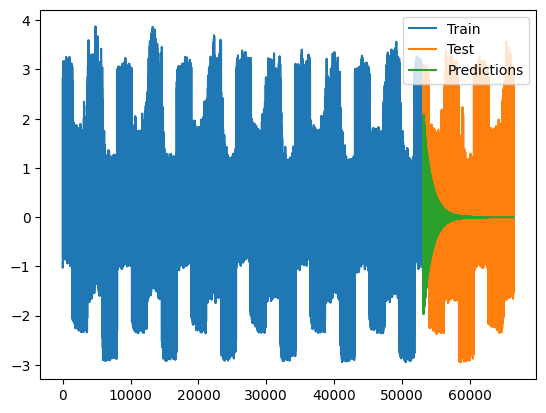

In [56]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()

## Results
Despite using a custom implemntation of AutoARIMA, and PCA, we were not able to get ARIMA to perform well over the test data. Other models are more suitable for this type of data, as we will see later.

In [57]:
df['Predictions'] = model_fit.forecast(steps=len(df))
df.to_csv('/home/hashim/Assignments/Sem6/DataMining/DM_Proj/data/COMED_hourly_ARIMA_predictions.csv')
df

,Datetime,COMED_MW_scaled,Season_encoded,Time_of_day_encoded,Holiday_encoded,Predictions
0,2011-01-01 01:00:00,-0.907578,3,3,1,NaN
1,2011-01-01 02:00:00,-0.953618,3,3,1,NaN
2,2011-01-01 03:00:00,-0.987313,3,3,1,NaN
3,2011-01-01 04:00:00,-1.022037,3,3,1,NaN
4,2011-01-01 05:00:00,-1.028081,3,3,1,NaN
...,...,...,...,...,...,...
66492,2018-08-02 20:00:00,1.764267,2,1,1,-0.000015
66493,2018-08-02 21:00:00,1.655338,2,1,1,-0.000006
66494,2018-08-02 22:00:00,-0.787778,2,3,1,0.000005
66495,2018-08-02 23:00:00,-0.869829,2,3,1,0.000015


In [58]:
# save the ARIMA model to file
model_fit.save('arima_model.pkl')